## digits classification using knn

### importing libraries

In [3]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
X = df
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [13]:
df['target'] = digits.target

In [15]:
y = df['target']
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [16]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

### splitting the dataset for training and testing

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=38)

In [22]:
len(X_train)

1437

In [23]:
len(X_test)

360

### importing the model

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
y_pred = knn.predict(X_test)
y_pred

array([9, 2, 2, 8, 1, 8, 4, 8, 9, 5, 0, 0, 6, 6, 9, 4, 5, 9, 3, 5, 6, 9,
       1, 2, 8, 4, 9, 4, 0, 6, 7, 1, 0, 6, 1, 5, 1, 5, 4, 6, 1, 9, 9, 6,
       8, 4, 5, 5, 0, 2, 4, 1, 7, 4, 2, 7, 2, 2, 1, 5, 4, 1, 3, 0, 2, 7,
       7, 3, 3, 9, 0, 1, 5, 0, 4, 1, 9, 9, 5, 3, 8, 8, 4, 4, 2, 7, 5, 1,
       7, 6, 6, 3, 1, 8, 9, 0, 0, 9, 3, 0, 3, 0, 4, 8, 4, 4, 4, 0, 5, 6,
       5, 6, 6, 0, 1, 3, 0, 2, 4, 4, 2, 1, 1, 4, 8, 4, 6, 8, 0, 4, 1, 3,
       3, 1, 6, 8, 3, 8, 9, 0, 4, 1, 1, 6, 3, 9, 3, 9, 2, 0, 2, 4, 8, 1,
       6, 9, 4, 3, 5, 6, 0, 7, 6, 4, 6, 7, 7, 4, 9, 8, 0, 8, 6, 0, 4, 0,
       0, 0, 3, 0, 7, 7, 2, 2, 5, 2, 8, 6, 6, 5, 4, 0, 0, 4, 3, 2, 5, 3,
       9, 5, 7, 1, 9, 2, 8, 6, 3, 2, 8, 1, 8, 6, 0, 5, 5, 9, 7, 6, 3, 7,
       8, 1, 1, 2, 5, 7, 2, 1, 7, 7, 4, 1, 3, 1, 3, 7, 3, 7, 1, 3, 4, 8,
       0, 7, 5, 3, 5, 5, 1, 1, 2, 4, 9, 3, 3, 6, 6, 5, 3, 1, 4, 8, 8, 2,
       4, 5, 0, 7, 8, 1, 0, 8, 4, 7, 7, 4, 6, 9, 9, 4, 1, 1, 7, 3, 0, 3,
       9, 2, 4, 6, 4, 8, 5, 0, 9, 2, 8, 8, 1, 7, 1,

In [30]:
knn.score(X_test,y_test)

0.9861111111111112

### confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 27]], dtype=int64)

Text(51.0, 0.5, 'truth')

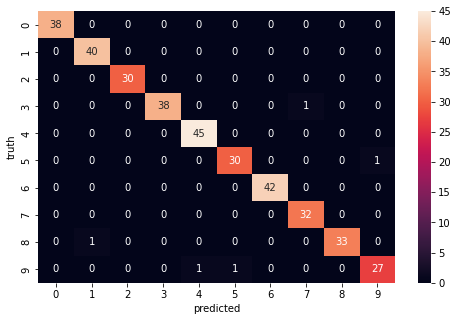

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(8,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

### classification report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.98      1.00      0.99        40
           2       1.00      1.00      1.00        30
           3       1.00      0.97      0.99        39
           4       0.98      1.00      0.99        45
           5       0.97      0.97      0.97        31
           6       1.00      1.00      1.00        42
           7       0.97      1.00      0.98        32
           8       1.00      0.97      0.99        34
           9       0.96      0.93      0.95        29

    accuracy                           0.99       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.99      0.99      0.99       360

